In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('./laptop_pricing_dataset_mod1.csv')
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [109]:
# Here we can round the screen-size-cm to nearest 2 decimal places
df['Screen_Size_cm'] = df['Screen_Size_cm'].round(2)
# or
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'], 2)
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.78,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.62,2.5,6,256,2.40,883


In [110]:
df.replace('?', np.nan)
for columns in df.isnull():
  print(df.isnull()[columns].value_counts())
  print("")

print(df.columns[df.isnull().any()])

Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64

Index(['Screen_Size_cm', 'Weight_kg'], dtype='object')


In [111]:
# Replacing the missing weight values with mean
# print(df['Weight_kg'].dtypes)

average_weight = df['Weight_kg'].mean(axis=0)
df['Weight_kg'].replace(np.nan, average_weight, inplace=True)
df['Weight_kg'].isnull().value_counts()

/var/folders/c6/bs1jtj1s34dg98gm3djvnd140000gn/T/ipykernel_19725/3944431824.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].replace(np.nan, average_weight, inplace=True)


Weight_kg
False    238
Name: count, dtype: int64

In [112]:
# Replacing the missing screen size values with most frequest size
most_frequent_size = df['Screen_Size_cm'].value_counts().idxmax()
print(most_frequent_size)
df['Screen_Size_cm'].replace(np.nan, most_frequent_size)

39.62


0      35.56
1      39.62
2      39.62
3      33.78
4      39.62
       ...  
233    35.56
234    33.78
235    30.48
236    39.62
237    35.56
Name: Screen_Size_cm, Length: 238, dtype: float64

In [113]:
# Standardizing the data
df['Weight_kg'] = 2.205 * df['Weight_kg']
df['Screen_Size_cm'] = df['Screen_Size_cm'] / 2.54
df.rename(columns={'Weight_kg': 'Weight_pound', "Screen_Size_cm": "Screen_Size_inch"}, inplace=True)
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,14.000000,2.6,8,256,3.74850,1891
234,234,Toshiba,3,Full HD,2,1,5,13.299213,2.4,8,256,2.64600,1950
235,235,Lenovo,4,IPS Panel,2,1,5,12.000000,2.6,8,256,2.99880,2236
236,236,Lenovo,3,Full HD,3,1,5,15.598425,2.5,6,256,5.29200,883


In [114]:
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()
df['CPU_frequency']

0      0.551724
1      0.689655
2      0.931034
3      0.551724
4      0.620690
         ...   
233    0.896552
234    0.827586
235    0.896552
236    0.862069
237    0.793103
Name: CPU_frequency, Length: 238, dtype: float64

(array([22., 64., 60., 36., 31., 14.,  5.,  2.,  1.,  3.]),
 array([ 527. ,  855.3, 1183.6, 1511.9, 1840.2, 2168.5, 2496.8, 2825.1,
        3153.4, 3481.7, 3810. ]),
 <BarContainer object of 10 artists>)

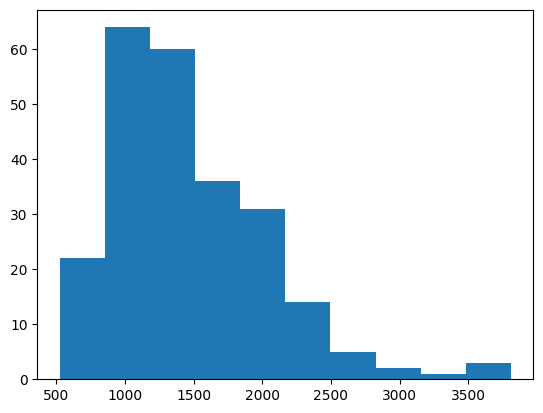

In [115]:
plt.hist(df['Price'])

In [116]:
bin_num = 3
# Bins must be monotonically increased means that the value of bins mush be in increasing order so min first then max
bins = np.linspace(min(df['Price']), max(df['Price']), bin_num + 1)
bin_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=bin_names, include_lowest=True)
df['Price-binned']

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
233    Medium
234    Medium
235    Medium
236       Low
237       Low
Name: Price-binned, Length: 238, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Text(0.5, 1.0, 'Price bins')

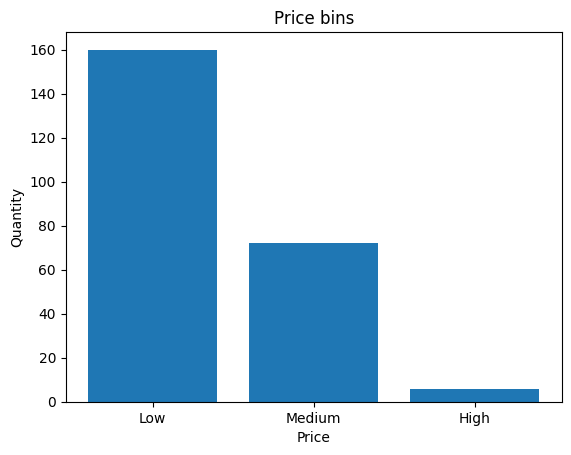

In [117]:
plt.bar(bin_names, df['Price-binned'].value_counts())
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price bins')

In [118]:
df = pd.concat([df, pd.get_dummies(df['Screen'])], axis=1)
df.rename(columns={'Full Hd': 'Screen-Full Hd', 'IPS Panel': 'Screen-IPS Panel'}, inplace=True)
df.drop('Screen', axis=1, inplace=True)
df

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price-binned,Full HD,Screen-IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,2,1,7,14.000000,0.896552,8,256,3.74850,1891,Medium,False,True
234,234,Toshiba,3,2,1,5,13.299213,0.827586,8,256,2.64600,1950,Medium,True,False
235,235,Lenovo,4,2,1,5,12.000000,0.896552,8,256,2.99880,2236,Medium,False,True
236,236,Lenovo,3,3,1,5,15.598425,0.862069,6,256,5.29200,883,Low,True,False
